In [26]:
from matplotlib import image
from matplotlib import pyplot
import os
import numpy as np
import cv2 
from ultralytics.utils.plotting import Annotator, colors
from ultralytics import YOLO


In [27]:
def toarabic(en_chr):
    arabic_chars = {
        "9.0": "أ",
        "10.0": "ع",
        "11.0": "ب",
        "12.0": "د",
        "13.0": "ف",
        "14.0": "ج",
        "15.0": "ه",
        "16.0": "ك",
        "17.0": "ل",
        "18.0": "م",
        "19.0": "ن",
        "20.0": "ر",
        "21.0": "س",
        "22.0": "ص",
        "23.0": "ط",
        "24.0": "و",
        "25.0": "ى",
        "0.0": "١",
        "1.0": "٢",
        "2.0": "٣",
        "3.0": "٤",
        "4.0": "٥",
        "5.0": "٦",
        "6.0": "٧",
        "7.0": "٨",
        "8.0": "٩"
    }

    for i in range(26):
        if en_chr == f"{i}.0":
            return arabic_chars[f"{i}.0"]

    return None  # Return None if the tensor value is not found


In [28]:
#models
plate_model=YOLO("./models/polo.pt")
ocr_model=YOLO("../models/best.pt")


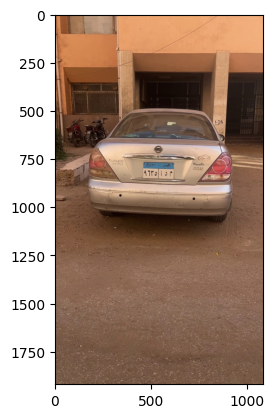

In [29]:
#path
frame=cv2.imread("out/م د أ ٥ ٣ ٩/frame_75.jpg")
# frame=cv2.VideoCapture("/dev/video0")
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
pyplot.imshow(frame)


In [30]:
#find plate
plate_model_tranied=plate_model(source=frame,save_txt=False,conf=.1)



0: 608x352 1 plate, 29.1ms
Speed: 3.0ms preprocess, 29.1ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 352)


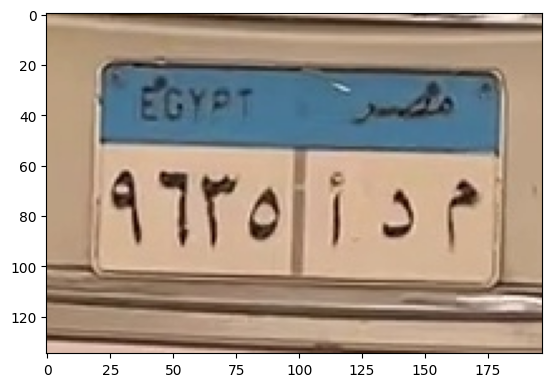

In [31]:
#crop plate
for plate in plate_model_tranied:
    carBox=plate.boxes
    if len(carBox)!=0:
        x1,y1,x2,y2=carBox.xyxy[0]
        x1,y1,x2,y2=int(x1),int(y1),int(x2),int(y2)
        cren_chrping_plate=frame[y1:y2,x1:x2]
        pyplot.imshow(cren_chrping_plate)
        # cv2.imshow("The Plate", cren_chrping_plate)
        # if cv2.waitKey(0) & 0xFF == ord("q"):
        #     break



In [32]:
#find chars
result=ocr_model.predict(cren_chrping_plate,conf=.01,iou=.1,max_det=7,device="cuda")


0: 448x640 1 3, 1 5, 1 6, 1 9, 1 a, 1 d, 1 m, 427.7ms
Speed: 4.6ms preprocess, 427.7ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


In [33]:
lis=[]
for en_chr in result:
    # print(en_chr.tojson())
    for i in en_chr :
        w=i.boxes

        x1,y1,x2,y2=w.xyxy[0]
        x1,y1,x2,y2=int(x1),int(y1),int(x2),int(y2)
        print(str(w.cls.item()))
        lis.append({"class":toarabic(str(w.cls.item())),"x":x1,"y":y1})
lis=sorted(lis,key=lambda x:x["x"])


18.0
12.0
4.0
8.0
9.0
2.0
5.0


In [34]:
#combine all chars in one string
plat_number=""
for i in lis:
  plat_number+=i["class"]
  plat_number+=" "

print(''.join(reversed(plat_number)))



 م د أ ٥ ٣ ٦ ٩
